<a href="https://colab.research.google.com/github/tnwjd3315/daily-commit/blob/main/MNIST_handwritten_digit_classification_better_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. mnist 데이터셋

# 1. Tensorflow 모델링 구현 (Feat. keras.Sequential)

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 나의 루트 경로 설정
rootdir = '/content/drive/MyDrive/Colab Notebooks'

# 2. 데이터 불러오기

In [ ]:
from tensorflow.keras.datasets  import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


데이터확인 (train 이미지 10개를 표시)

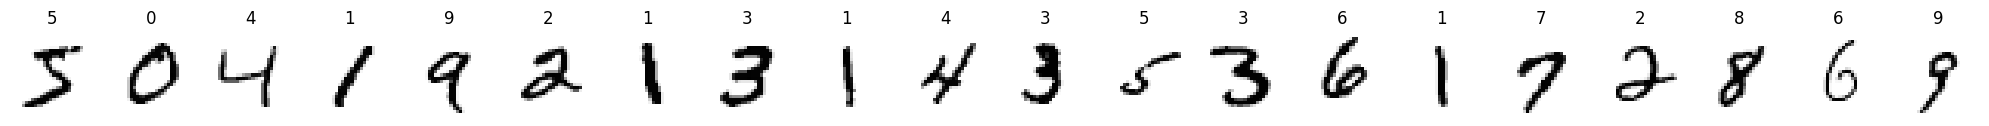

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=20, figsize=(20, 2), layout='tight')

for i in range(20):
    axs.flat[i].set_title(y_train[i])
    axs.flat[i].imshow(x_train[i], cmap='Greys')
    axs.flat[i].axis('off')  # 필요에 따라 축 없애기

plt.show()

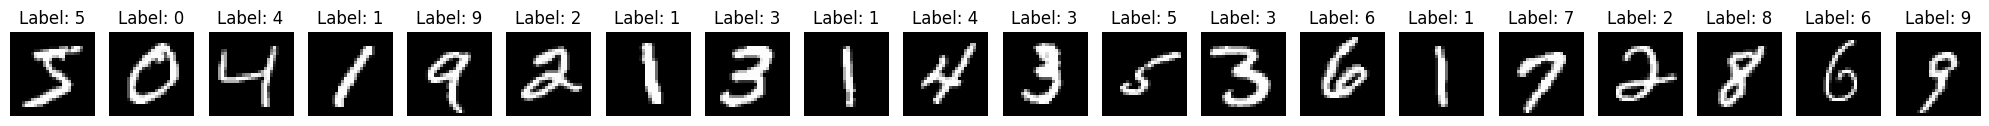

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(20, 2))

for i in range(20):
    plt.subplot(1, 20, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

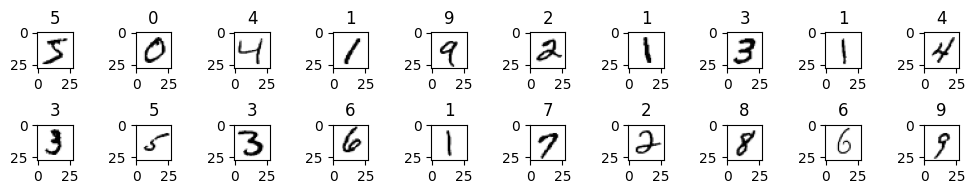

In [ ]:
import matplotlib.pyplot as plt

# fig : 전체 그림(figure)을 나타내는 객체입니다. 서브플롯들을 포함하고 있는 큰 그림입니다.
# axs : 서브플롯을 나타내는 배열입니다. 이 배열의 각 요소는 개별 서브플롯을 나타내는 Axes 객체입니다.
# nrows = 2 : 서브플롯의 행(row) 개수를 2로 설정합니다.
# ncols = 10 : 서브플롯의 열(column) 개수를 10으로 설정합니다.
# layout = 'tight' : 서브플롯 간의 여백을 최소화하여 레이아웃을 조정합니다. 즉, 서브플롯들이 서로 붙어 보이도록 배치합니다.
# figsize = (10, 2) : 전체 그림의 크기를 가로 10 인치, 세로 2 인치로 설정합니다.
fig, axs = plt.subplots(nrows = 2, ncols = 10, layout = 'tight', figsize = (10, 2))

for i in range(20):
  axs.flat[i].set_title(y_train[i])
  axs.flat[i].imshow(x_train[i], cmap = 'Greys')
  #axs.flat[i].set_axis_off()
plt.show()

In [ ]:
import numpy as np
# 0 ~ 255 까지의 밝기
np.min(x_train[0]), np.max(x_train[0])
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

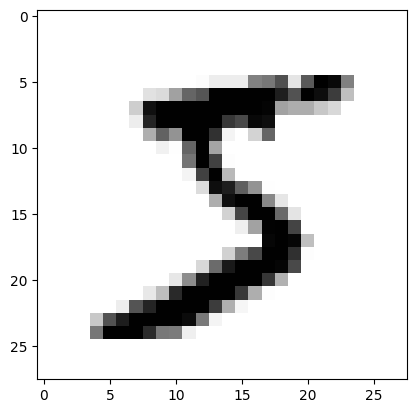

In [ ]:
plt.gca().grid(False)
plt.imshow(x_train[0], cmap= plt.cm.binary)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# 3. 전처리

독립변수 - 차원축소 (60000 x 28 x 28 => 60000 x 784)

Input Layer는 1차원으로 입력해야 하므로, (28 x 28) => (784) 로 변환

In [ ]:
#x_train_1d = x_train.reshape(60000, 28*28)
x_train_1d = x_train.reshape(60000, -1)
x_test_1d = x_test.reshape(10000, -1)

x_train_1d.shape, x_test_1d.shape

((60000, 784), (10000, 784))

독립변수 - 스케일 조정

min-max scaler 과 동일한 처리이나, min값이 0이라 그냥 max값으로 나눠주는 것과 동일함.

In [ ]:
# 0 ~ 255 까지 스케일
x_train_1d = x_train_1d / 255.0
x_test_1d = x_test_1d / 255.0

종속변수 - 원핫인코딩

종속변수의 유니크한 값 개수 확인

In [ ]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_enc = to_categorical(y_train)
y_test_enc = to_categorical(y_test)

y_train_enc.shape, y_test_enc.shape

((60000, 10), (10000, 10))

In [ ]:
print(y_train[:5]) # 원핫인코딩 전
print(y_train_enc[:5]) # 원핫인코딩 후

[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# 4. 모델링

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()

EPOCHS = 100		# epoch 회수 지정

Input_cnt = 784		# Input Layer 의 입력개수 지정
Output_cnt = 10		# Output Layer 의 출력개수 지정

model.add(Input(shape=(Input_cnt,)))                        # Input Layer

model.add(Dense(256, activation='relu'))                    # Hidden Layer
model.add(Dense(128, activation='relu'))                    # Hidden Layer
model.add(Dense(Output_cnt, activation='softmax'))          # Out Layer

model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 모델링 얼리스탑핑 설정
# patience = 20 : 20 epoch 동안 더 개선이 안되면,, 20epoch 전의 loss를 가져온다.
esc = EarlyStopping(monitor='val_loss', patience=20)

# 모델을 저장
chkpt = ModelCheckpoint(filepath=rootdir + '/mnist_model.keras', monitor = 'val_loss', verbose = 1, save_best_only = True)

# 모델을 학습
hist = model.fit(x_train_1d, y_train_enc, validation_data = (x_test_1d, y_test_enc), callbacks = [esc, chkpt], epochs = EPOCHS)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8917 - loss: 0.3640
Epoch 1: val_loss improved from inf to 0.09572, saving model to /content/drive/MyDrive/Colab Notebooks/mnist_model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8918 - loss: 0.3636 - val_accuracy: 0.9707 - val_loss: 0.0957
Epoch 2/100
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9715 - loss: 0.0887
Epoch 2: val_loss improved from 0.09572 to 0.08159, saving model to /content/drive/MyDrive/Colab Notebooks/mnist_model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9715 - loss: 0.0887 - val_accuracy: 0.9753 - val_loss: 0.0816
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9808 - loss: 0.0580
Epoch 3: val_loss improved from 0.08159 to 0.07311, saving model to /content/drive/MyDrive/Colab Notebooks/mnist_model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9808 - loss: 0.0580 - val_accuracy: 0.9778 - val_loss: 0.0731
Ep

In [ ]:
# 종료된 epoch 길이 설정
e_stop_cnt = 26

그래프 그리기

Text(0, 0.5, 'Accuracy')

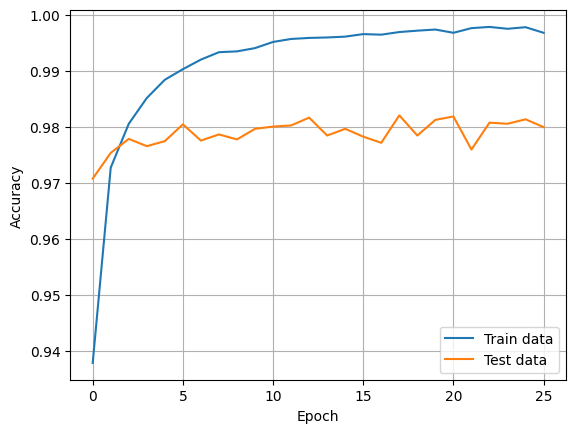

In [ ]:
# 정확도 그래프 그리기
import matplotlib.pyplot as plt
plt.plot(range(e_stop_cnt), hist.history['accuracy'][:e_stop_cnt], label = 'Train data')
plt.plot(range(e_stop_cnt), hist.history['val_accuracy'][:e_stop_cnt], label = 'Test data')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'loss')

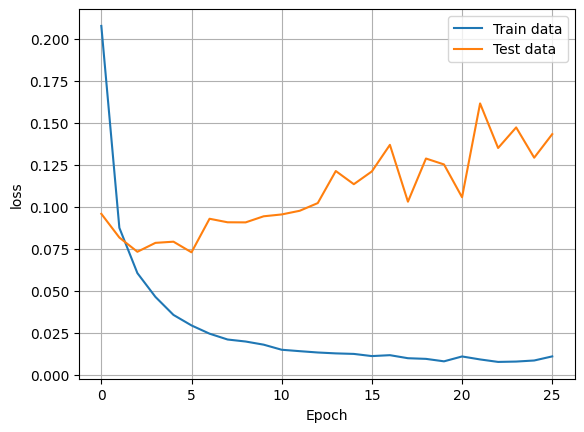

In [ ]:
# loss 그래프 그리기
import matplotlib.pyplot as plt
plt.plot(range(e_stop_cnt), hist.history['loss'][:e_stop_cnt], label = 'Train data')
plt.plot(range(e_stop_cnt), hist.history['val_loss'][:e_stop_cnt], label = 'Test data')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('loss')

In [ ]:
def train_report(hist):
  fig, axs = plt.subplots(nrows = 1, ncols = 2, layout = 'tight', figsize = (7, 3))

  for i, mt in enumerate(['accuracy', 'val_accuracy', 'loss', 'val_loss']):
    if i % 2 == 0:
        axs.flat[i//2].set_title(mt)
    axs.flat[i//2].plot(range(len(hist.history[mt])), hist.history[mt], label = mt)
    #axs.flat[i/2].imshow(x_train[i], cmap = 'Greys')
    #axs.flat[i].set_axis_off()
  plt.show()

  train_report(hist)

저장한 모델 가져오기

In [ ]:
from tensorflow.keras.models import load_model

ha_model = load_model(rootdir + '/mnist_model.keras')
ha_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705,440 (2.69 MB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 470,294 (1.79 MB)

불러온 모델로 예측(predict) 하기 1

In [ ]:
print(x_test_1d.shape)
print(x_test_1d[0].shape)
print(x_test_1d[:1].shape)
print(x_test_1d[np.newaxis, 0].shape)

(10000, 784)
(784,)
(1, 784)
(1, 784)


In [ ]:
# predict 매개변수는 2차원의 데이터를 넣어야 됨.
pred = ha_model.predict(x_test_1d[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


In [ ]:
print(pred)
print(np.sum(pred))

[[1.1592127e-10 1.3825632e-08 5.4439096e-07 2.5632229e-07 1.0627643e-09
  9.9908137e-10 1.6396405e-12 9.9999917e-01 2.3234023e-10 3.1618953e-08]]
1.0


불러온 모델로 예측(predict) 하기 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
예측값 :  [1]


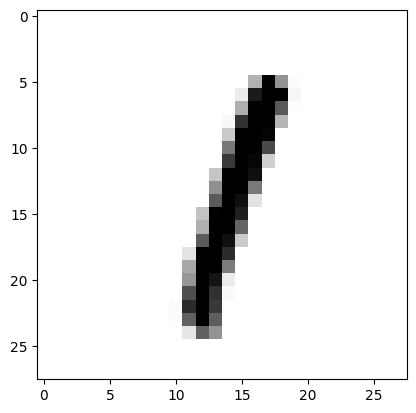

In [ ]:
img_idx = 5

plt.gca().grid(False)
plt.imshow(x_test[img_idx], cmap= plt.cm.binary)

pred = ha_model.predict(x_test_1d[img_idx:img_idx + 1])
print('예측값 : ', np.argmax(pred, axis = 1))